<a href="https://colab.research.google.com/github/notnsas/data-science-application-college-task/blob/main/ADS_P8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
import kagglehub

In [18]:
# Download latest version
path = kagglehub.dataset_download("mirichoi0218/insurance")

csv_file_path = f'{path}/insurance.csv'

In [19]:
df = pd.read_csv(csv_file_path)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [20]:
df.duplicated().sum()

np.int64(1)

In [21]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


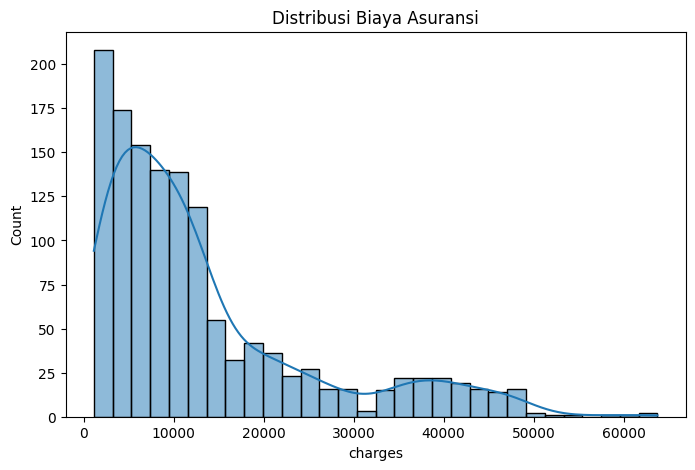

In [22]:
# Visualisasi distribusi charges
plt.figure(figsize=(8, 5))
sns.histplot(df['charges'], kde=True)
plt.title('Distribusi Biaya Asuransi')
plt.show()

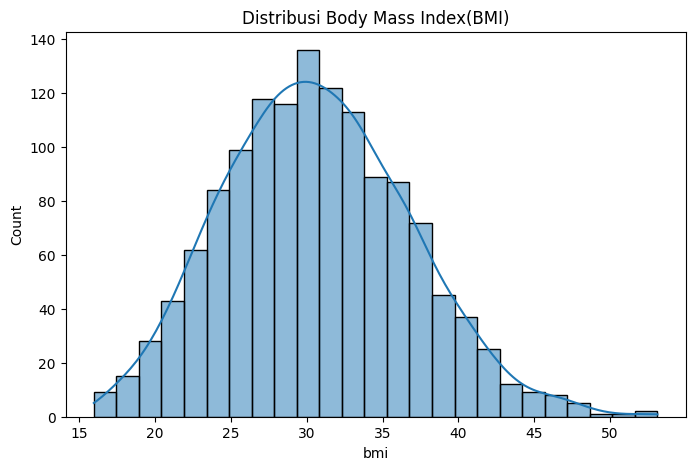

In [23]:
# Visualisasi distribusi charges
plt.figure(figsize=(8, 5))
sns.histplot(df['bmi'], kde=True)
plt.title('Distribusi Body Mass Index(BMI)')
plt.show()

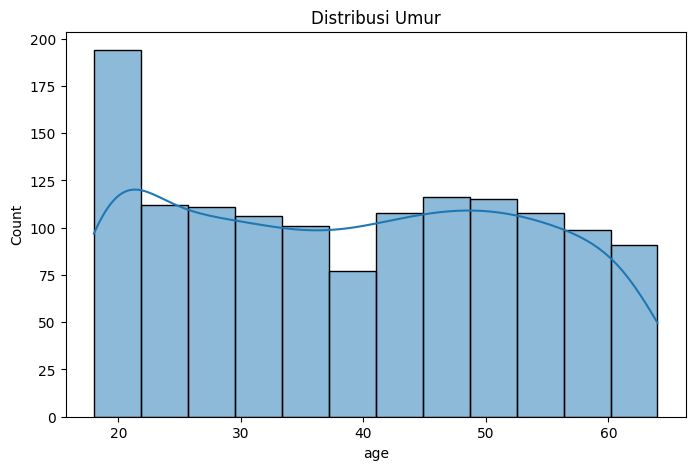

In [24]:
# Visualisasi distribusi charges
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], kde=True)
plt.title('Distribusi Umur')
plt.show()

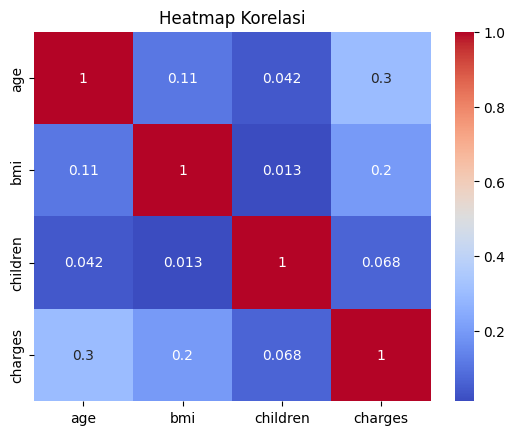

In [25]:
# Korelasi numerik
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi')
plt.show()

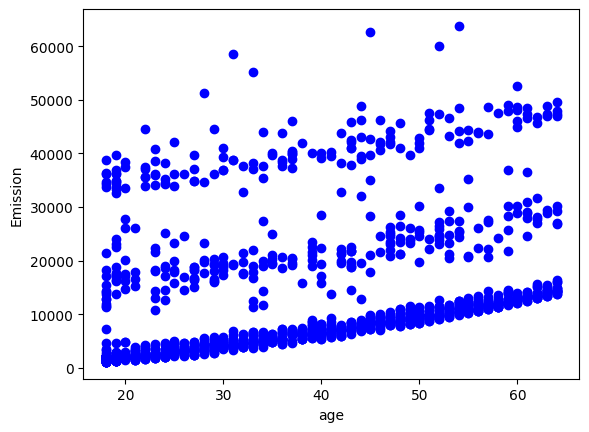

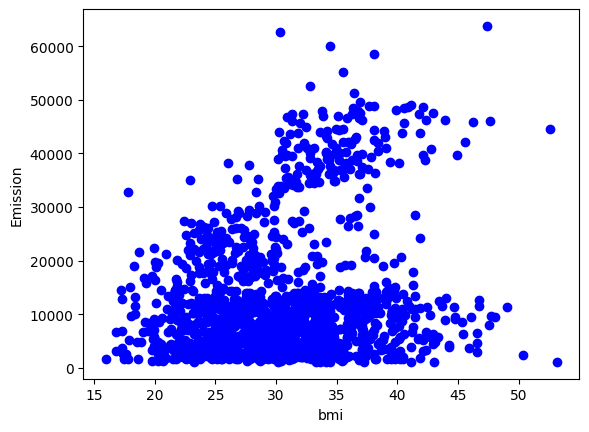

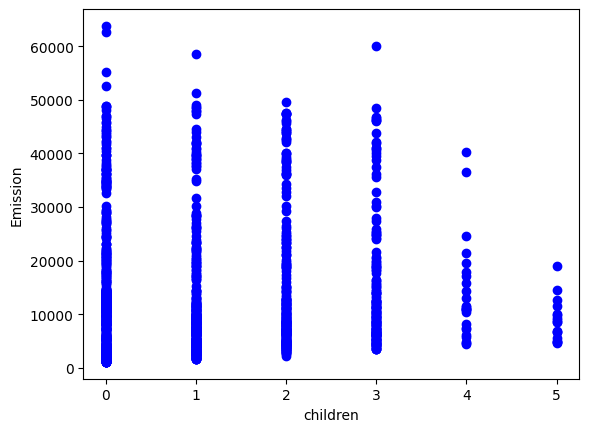

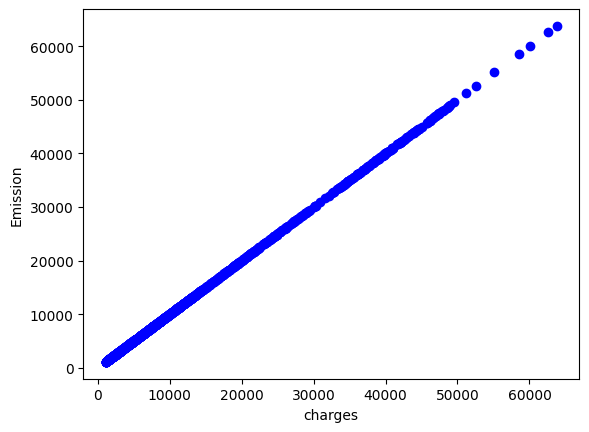

In [26]:
numerical_col = [i for i in df.select_dtypes(include='number').columns]
cdf = df[numerical_col]
for i in numerical_col:
  plt.scatter(cdf[i], cdf['charges'], color='blue')
  plt.xlabel(i)
  plt.ylabel("Emission")
  plt.show()


In [26]:
# Abcdefghijk